# Model use (assesment of new terminal project)

In [68]:
# define mean occupancy of the new terminal
variable = new_outcomes['terminal_occupancy_project31']

mean_list = []
mean_list2 = []
mean_list3 = []
for e in range(len(variable)):
    mean_list.append(np.mean(variable[e]))

new_outcomes['mean_terminal_occupancy_project31'] = np.array(mean_list)

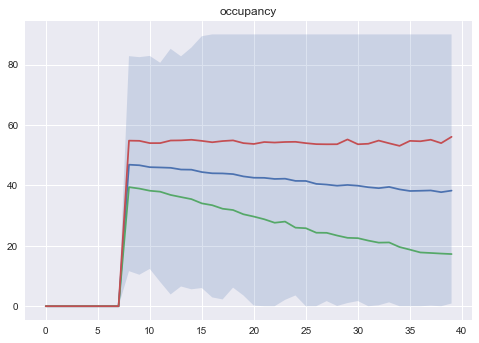

In [67]:
data1_list = new_outcomes['terminal_occupancy_project31']
plt.plot(np.mean(data1_list, axis=0), label = 'mean')
plt.fill_between(np.arange(0, data1_list.shape[1]),np.min(data1_list, axis=0), np.max(data1_list, axis=0), alpha=0.2)
plt.plot(np.percentile(data1_list, 25, axis=0), label='first quartile')
plt.plot(np.percentile(data1_list, 75, axis=0), label='third quartile')
# plt.ylim([10000,100000])
plt.title('occupancy')
plt.legend
plt.show()


[EMA/INFO/MainProcess] 1000 points remaining, containing 198 cases of interest


198.0
198.0


[EMA/INFO/MainProcess] mean: 0.9682539682539683, mass: 0.063, coverage: 0.30808080808080807, density: 0.9682539682539683 restricted_dimensions: 5


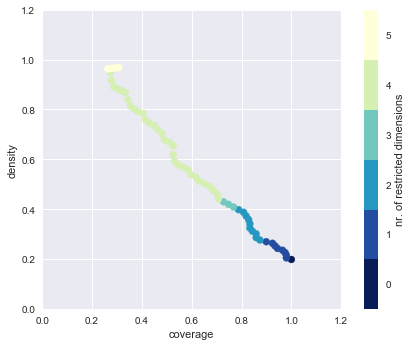

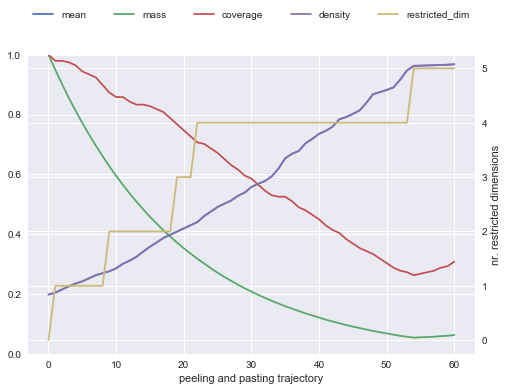

coverage    0.308081
density     0.968254
mass           0.063
mean        0.968254
res dim            5
Name: 60, dtype: object

                              box 60                        
                                 min       max     qp values
market_share_base_growth_f  0.003586  0.019962  6.223333e-13
c                           0.030147  0.294797  4.334974e-12
other_grey_share_growth_f  -0.014681 -0.000346  3.343048e-10
energy_demand_growth_f     -0.000681  0.012996  3.599592e-03
a                           0.004333  0.199870  4.285611e-01



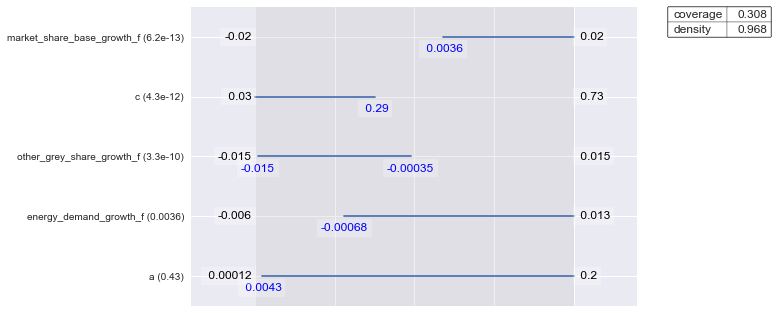

In [70]:
def classify(new_outcomes):

    area_TP_current = new_outcomes['area_TP_current4']
    area_TP_project = new_outcomes['area_TP_project4']

    TP_current = new_outcomes['total_TP_rdam_current']
    TP_project = new_outcomes['total_TP_rdam_project']
    
    terminal_occupancy = new_outcomes['terminal_occupancy_project31']
    
    # terminal is built in 2025, therefore start at t=15 to measure
    area_TP_current_15 = area_TP_current[:,15]
    area_TP_current_30 = area_TP_current[:,30]
    area_TP_current_39 = area_TP_current[:,39]    
    
    area_TP_project_15 = area_TP_project[:,15]
    area_TP_project_30 = area_TP_project[:,30]
    area_TP_project_39 = area_TP_project[:,39]

    TP_current_15 = TP_current[:,15]
    TP_current_30 = TP_current[:,30]
    TP_current_39 = TP_current[:,39]    
    
    TP_project_15 = TP_project[:,15]
    TP_project_30 = TP_project[:,30]
    TP_project_39 = TP_project[:,39]
    
    terminal_occupancy15 = terminal_occupancy[:,15]
    terminal_occupancy30 = terminal_occupancy[:,30]
    terminal_occupancy39 = terminal_occupancy[:,39]
    

    logical1 = (area_TP_project_15 > area_TP_current_15) & (area_TP_project_30 > area_TP_current_30) & (area_TP_project_39 > area_TP_current_39)
    logical2 = (TP_current_15 < TP_project_15) & (TP_current_30 < TP_project_30) & (TP_current_39 < TP_project_39) 
    logical3 = (terminal_occupancy15 > 50) & (terminal_occupancy30 > 50) & (terminal_occupancy39 > 50)
 
    classes = np.zeros(area_TP_project_15.shape[0])
    classes[logical1 & logical2 & logical3] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


[EMA/INFO/MainProcess] NPV not shown because it is not time series data
[EMA/INFO/MainProcess] total_variation_mean_area_occupancy_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_range_mean_area_occupancy_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_variation_coal_throughput_Rdam_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_range_coal_throughput_Rdam_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_capacity_growth not shown because it is not time series data
[EMA/INFO/MainProcess] mean_terminal_occupancy_project31 not shown because it is not time series data


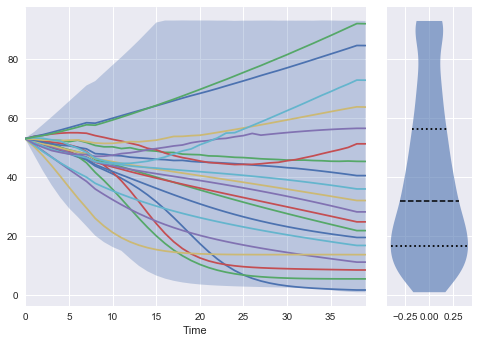

In [71]:
plt.close('all')
variable = 'area_occupancy_project4'

variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:50]  
figure = lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles='terminal_occupancy_project31', ylabels='occupancy')
plt.show()

[EMA/INFO/MainProcess] NPV not shown because it is not time series data
[EMA/INFO/MainProcess] total_variation_mean_area_occupancy_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_range_mean_area_occupancy_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_variation_coal_throughput_Rdam_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_range_coal_throughput_Rdam_current not shown because it is not time series data
[EMA/INFO/MainProcess] total_capacity_growth not shown because it is not time series data
[EMA/INFO/MainProcess] mean_terminal_occupancy_project31 not shown because it is not time series data


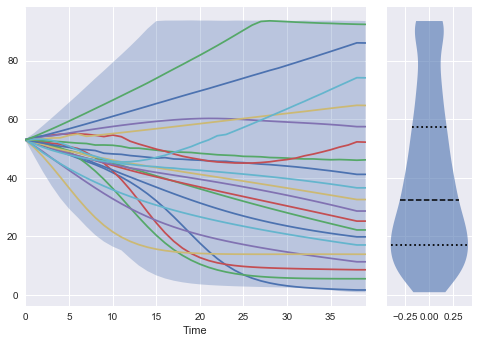

In [72]:
plt.close('all')
variable = 'area_occupancy_current4'

variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:50]  
figure = lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles='terminal_occupancy_project31', ylabels='occupancy')
plt.show()

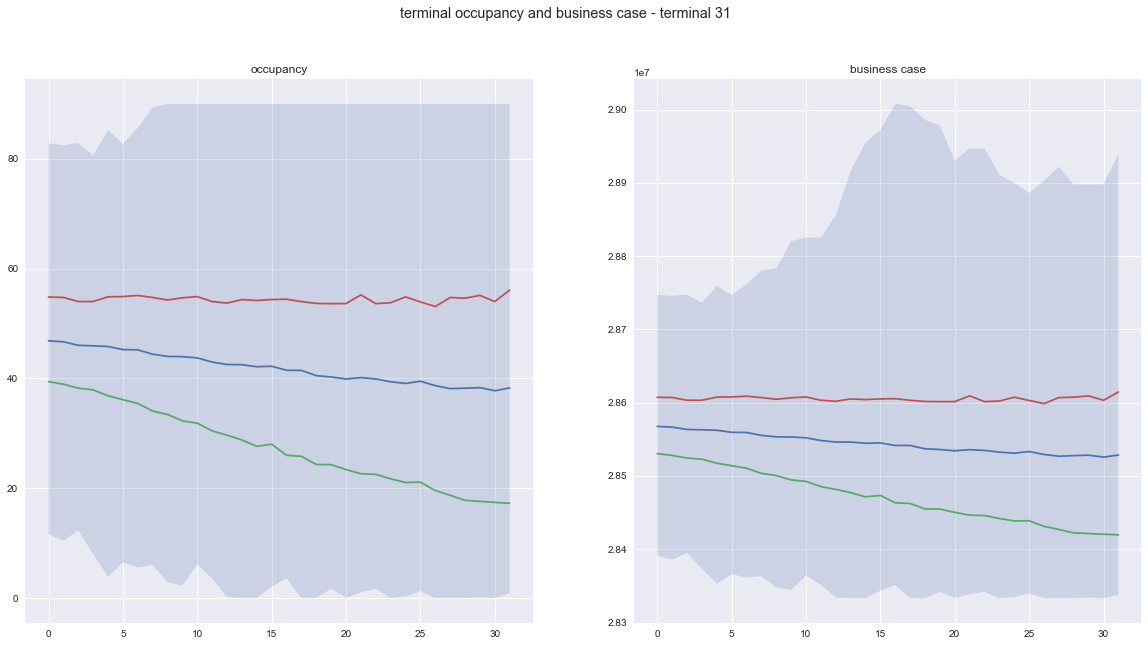

In [73]:
data1 = new_outcomes['terminal_occupancy_project31']
data2 = new_outcomes['business_case_terminal_project31']

data1_list = []
for i in range(len(data1)):
    data1_list.append(data1[i][8:])
data1_list = np.array(data1_list)

data2_list = []
for i in range(len(data2)):
    data2_list.append(data2[i][8:])
data2_list = np.array(data2_list)


plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('terminal occupancy and business case - terminal 31')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1_list, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1_list.shape[1]),np.min(data1_list, axis=0), np.max(data1_list, axis=0), alpha=0.2)
ax.plot(np.percentile(data1_list, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1_list, 75, axis=0), label='third quartile')
# plt.ylim([10000,100000])
plt.title('occupancy')
plt.legend

ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2_list, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2_list.shape[1]),np.min(data2_list, axis=0), np.max(data2_list, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2_list, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2_list, 75, axis=0), label='third quartile')
# plt.ylim([10000,100000])
plt.title('business case')
plt.legend
plt.show()

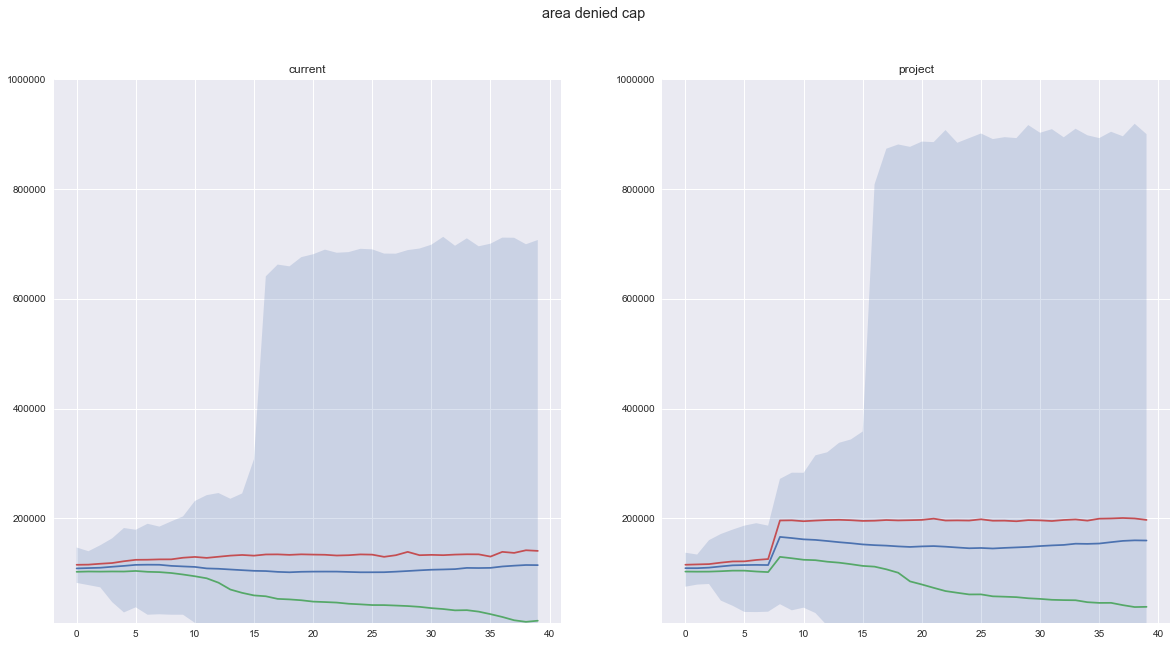

In [74]:
data1 = new_outcomes['area_denied_infra_cap_current4']
data2 = new_outcomes['area_denied_infra_cap_project4']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('area denied cap')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([10000,1000000])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([10000,1000000])
plt.title('project')

plt.show()

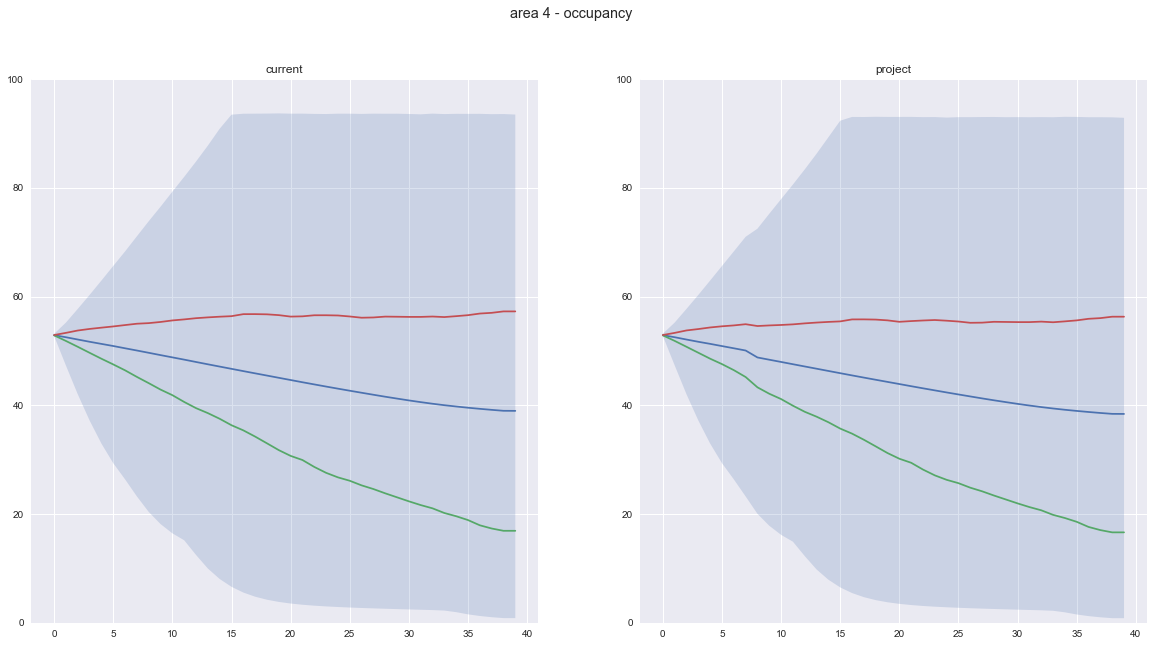

In [75]:
data1 = new_outcomes['area_occupancy_current4']
data2 = new_outcomes['area_occupancy_project4']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('area 4 - occupancy')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([0,100])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([0,100])
plt.title('project')

plt.show()

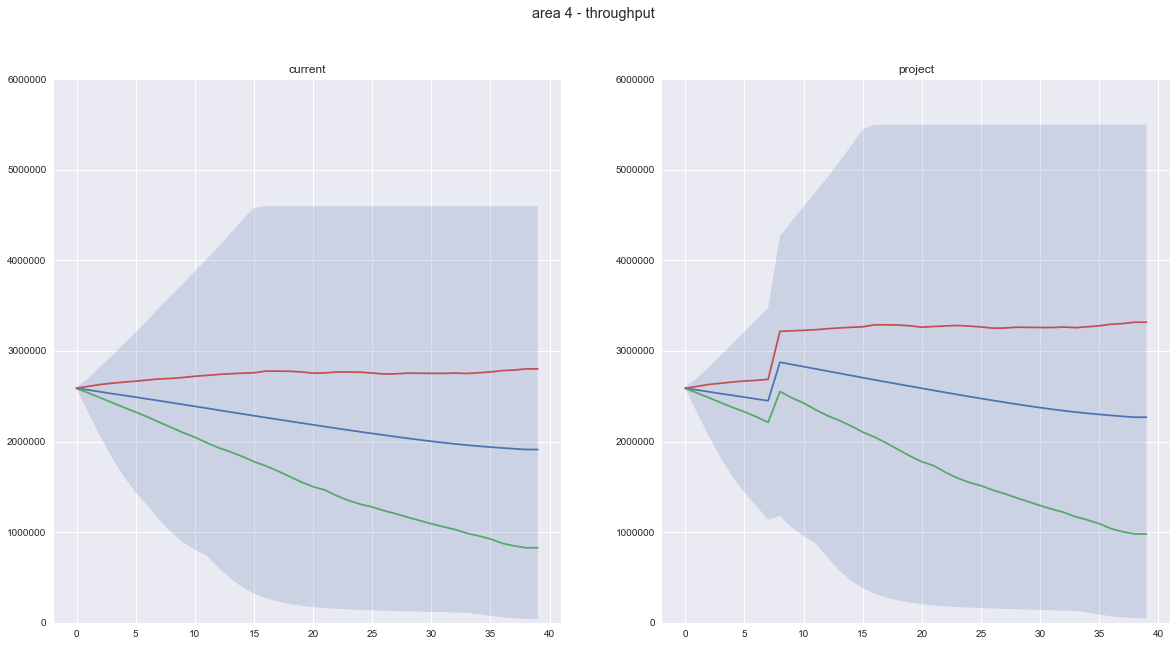

In [76]:
data1 = new_outcomes['area_TP_current4']
data2 = new_outcomes['area_TP_project4']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('area 4 - throughput')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([0,6000000])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([0,6000000])
plt.title('project')

plt.show()

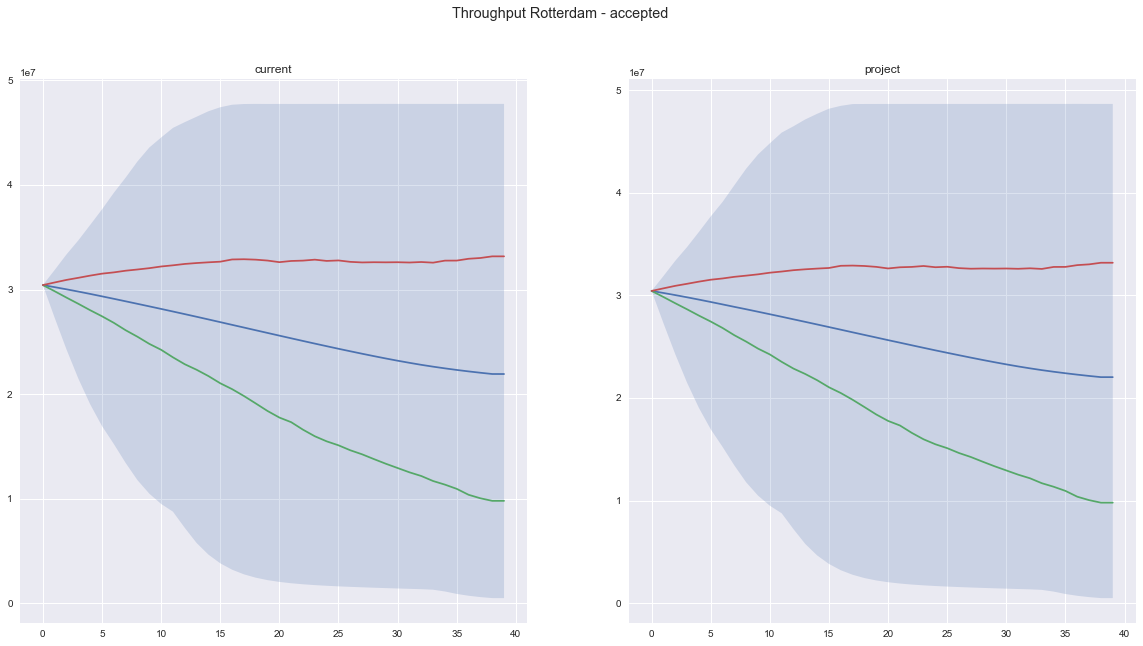

In [78]:
data1 = new_outcomes['total_TP_rdam_current']
data2 = new_outcomes['total_TP_rdam_project']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('Throughput Rotterdam - accepted')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.title('project')

plt.show()